In [1]:
import numpy as np
import rasterio as rio
import sys
sys.path.append('..')
from utils import d_sl, dense_vegetation, version, DATA_PATH
from produce_maps.tcrit import data_both_biomes
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

d_ext = {"South America": "south_america",  "Africa": "africa", "SE Asia": "south_east_asia"}
d_ext = {value: key for key, value in d_ext.items()}
d_ext_latex = { # for latex
    "South America": 'SA',
    "SE Asia": 'SEA',
    "Africa": "A"
}

# Relies on outputs of produce_maps/get_TSM_per_year_future.py

In [ ]:
data_group = []
for year in ['2001', '2020']:
    data = []
    for ext in d_sl.keys():
        values = np.load(DATA_PATH + f"/outputs/deltaTcrit_Tmodis{ext}_{year}_tcrit1981_2010{version}.npy")
        values = values.flatten()
        values = values[~np.isnan(values)]
        low_percentile = 0
        high_percentile = 100

        low_value = np.percentile(values, low_percentile)
        high_value = np.percentile(values, high_percentile)

        # Filter values within the percentile range
        values = values[(values >= low_value) & (values <= high_value)]
        data.append(values)
    data_group.append(data)
    


In [ ]:
for acclimation in [False, True]:
    for ssp in ['2041_2070_ssp370', '2071_2100_ssp370']:
        data = []
        for ext, sl in d_sl.items():
            y = '2050' if ssp == '2041_2070_ssp370' else '2100'
            filename_delta = DATA_PATH + f"/2050-2100_temperatures/delta_tsurf_2020_{y}.tif"
            delta_tsurf = rio.open(filename_delta, 'r').read(1)[sl]
            delta_tsurf[delta_tsurf==-20] = np.nan
            delta_tsurf *= dense_vegetation[sl]
            delta_tsurf[dense_vegetation[sl]==0] = np.nan
            delta_tsurf[~data_both_biomes[sl]] = np.nan


            values = np.load(DATA_PATH + f"/outputs/deltaTcrit_Tmodis{ext}_2020_tcrit{ssp}{version}.npy")
            values = values - delta_tsurf
            if acclimation:
                values += (delta_tsurf * 0.38)
            values = values.flatten()
            values = values[~np.isnan(values)]
            low_percentile = 0
            high_percentile = 100

            low_value = np.percentile(values, low_percentile)
            high_value = np.percentile(values, high_percentile)

            # Filter values within the percentile range
            values = values[(values >= low_value) & (values <= high_value)]
            data.append(values)
        data_group.append(data)



<Figure size 640x480 with 0 Axes>

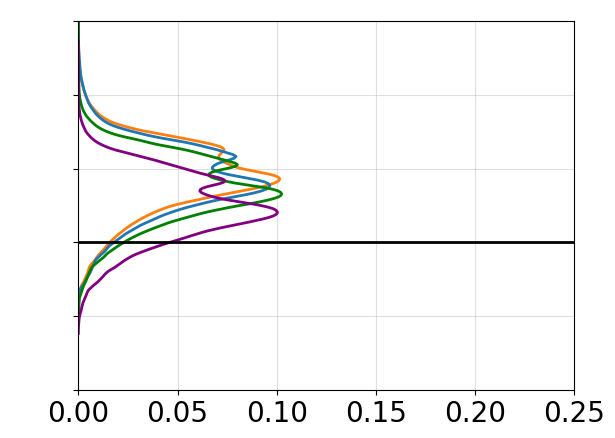

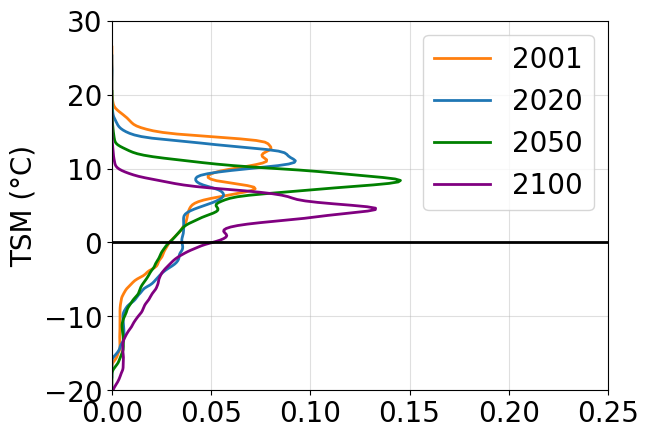

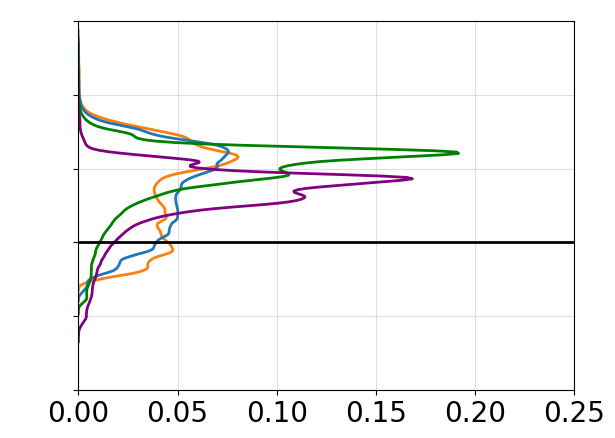

In [5]:
plt.rcParams.update({'font.size': 20})
data_2001 = data_group[0]
data_2020 = data_group[1]
data_2050 = data_group[2]
data_2100 = data_group[3]
data_2050_acclimation = data_group[4]
data_2100_acclimation = data_group[5]
plt.rcParams.update({'font.size': 20,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica Neue'})

fig = plt.figure()

colors = ['tab:orange', 'tab:blue', 'green', 'purple', 'tab:pink']
linestyles = ['dashed', 'dashdot', 'dotted']
legends = ["SE Asia", "South America", "Africa"]
for i in range(3):
    plt.figure()
    sns.kdeplot(y=data_2001[i], color = colors[0], linewidth=2)
    sns.kdeplot(y=data_2020[i], color = colors[1], linewidth=2)
    sns.kdeplot(y=data_2050[i], color = colors[2], linewidth=2)
    sns.kdeplot(y=data_2100[i], color = colors[3], linewidth=2)
    plt.plot([], c=colors[0], label='2001', linewidth=2)
    plt.plot([], c=colors[1], label='2020', linewidth=2)
    plt.plot([], c=colors[2], label='2050', linewidth=2)
    plt.plot([], c=colors[3], label='2100', linewidth=2)
    if legends[i] == "South America":
        plt.ylabel('TSM (°C)')
        plt.legend()
    else:
        plt.gca().yaxis.set_tick_params(labelcolor='none')
    plt.ylim(-20,30)
    plt.xlim(0,0.25)
    plt.grid(alpha=0.4)
    # 
    plt.hlines(y=0,xmin=0, xmax=0.25, colors='black', linewidth=2)
    plt.xlabel(f'')
    plt.savefig(f"../figures/Figure3/{d_ext_latex[legends[i]]}.png", bbox_inches='tight')

## Appendix: Acclimation

<Figure size 640x480 with 0 Axes>

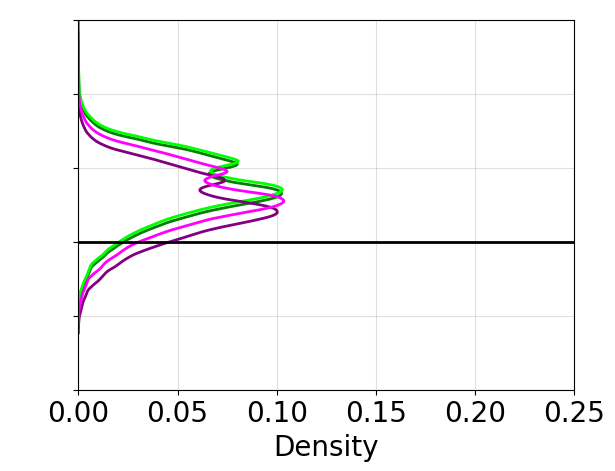

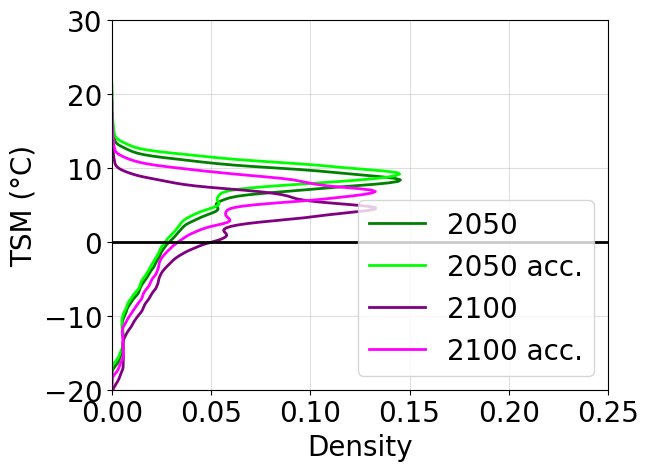

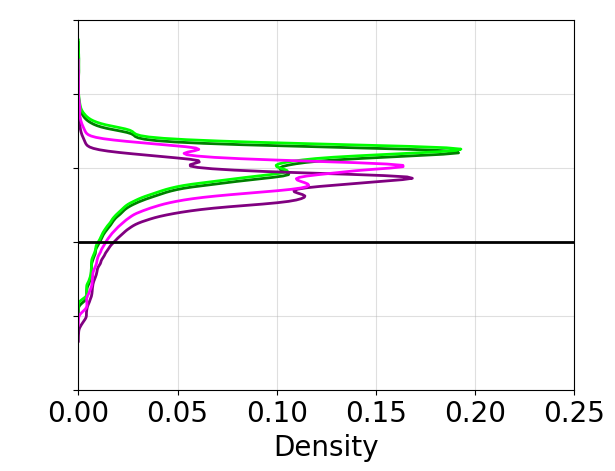

In [6]:
plt.rcParams.update({'font.size': 20})
data_2001 = data_group[0]
data_2020 = data_group[1]
data_2050 = data_group[2]
data_2100 = data_group[3]
data_2050_acclimation = data_group[4]
data_2100_acclimation = data_group[5]
plt.rcParams.update({'font.size': 20,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica Neue'})

fig = plt.figure()

colors = ['tab:orange', 'tab:blue', 'green', 'purple', 'lime', 'fuchsia']
linestyles = ['dashed', 'dashdot', 'dotted']
legends = ["SE Asia", "South America", "Africa"]
for i in range(3):
    plt.figure()
    sns.kdeplot(y=data_2050[i], color = colors[2], linewidth=2)
    sns.kdeplot(y=data_2050_acclimation[i], color = colors[4], linewidth=2)
    sns.kdeplot(y=data_2100[i], color = colors[3], linewidth=2)
    sns.kdeplot(y=data_2100_acclimation[i], color = colors[5], linewidth=2)
    plt.plot([], c=colors[2], label='2050', linewidth=2)
    plt.plot([], c=colors[4], label='2050 acc.', linewidth=2)
    plt.plot([], c=colors[3], label='2100', linewidth=2)
    plt.plot([], c=colors[5], label='2100 acc.', linewidth=2)
    if legends[i] == "South America":
        plt.ylabel('TSM (°C)')
        plt.legend()
    else:
        plt.gca().yaxis.set_tick_params(labelcolor='none')
    plt.ylim(-20,30)
    plt.xlim(0,0.25)
    plt.grid(alpha=0.4)
    # 
    plt.hlines(y=0,xmin=0, xmax=0.25, colors='black', linewidth=2)
    plt.savefig(f"../figures/Figure3/acclimation_{d_ext_latex[legends[i]]}.png", bbox_inches='tight')

## maps

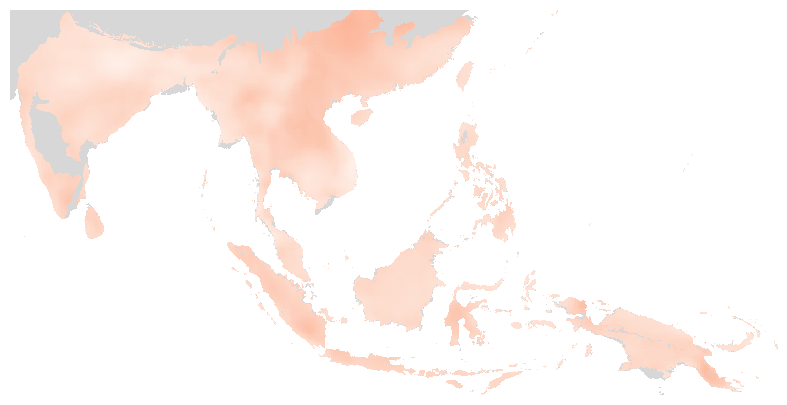

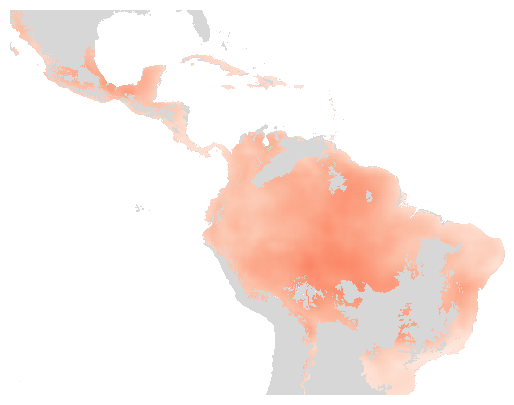

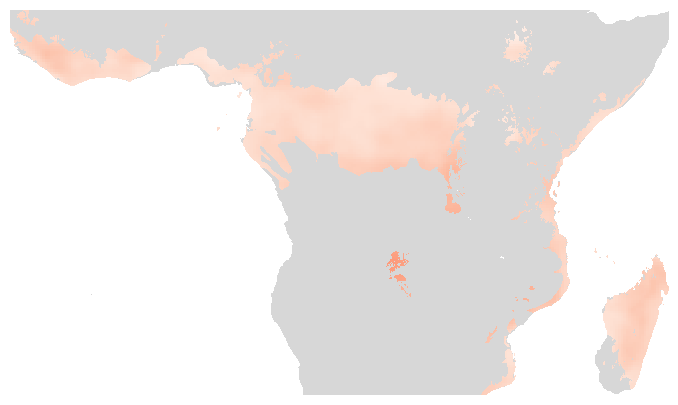

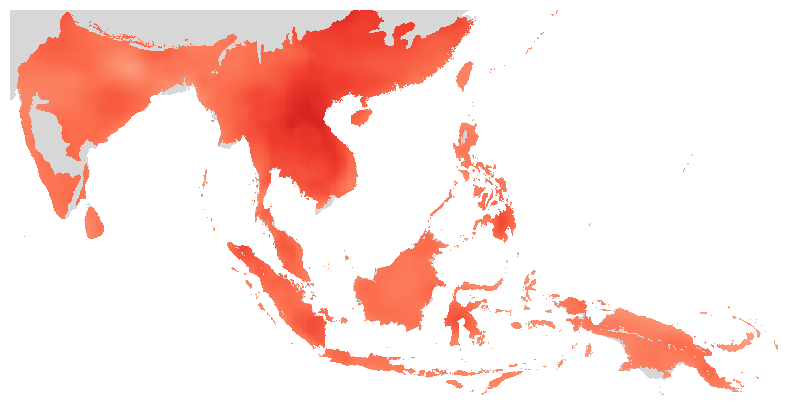

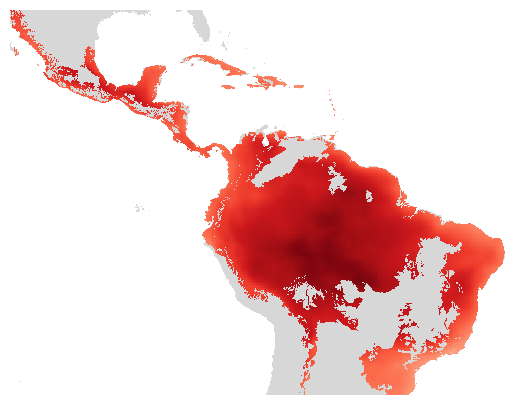

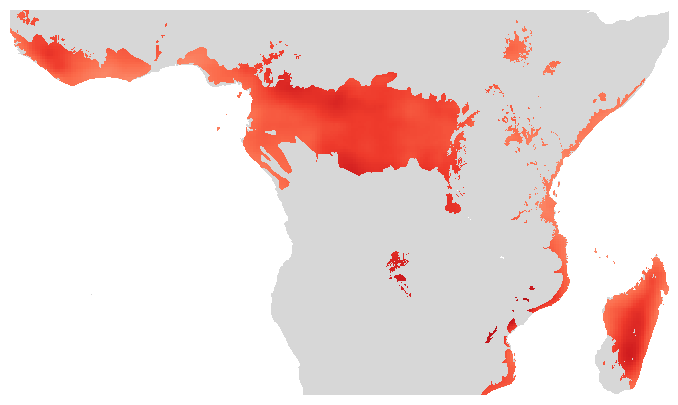

In [7]:
terra = rio.open(DATA_PATH + "/terraaqua.tif", 'r').read(1)

def make_fig__(data_species, figsize=(10,5), sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg',save_title=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    cmap_terra = ListedColormap(['white', '#D7D7D7FF']) 
    img = terra[sl].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = cmap_
    cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    d = data_species.squeeze().copy()
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation) 
    min_cbar = int(np.nanmin(d)) 
    min_cbar = 0
    max_species = int(np.nanmax(d))
    max_species = 7
    im.set_clim(min_cbar, max_species)
    ax.set_axis_off()

for key in d_sl.keys():
    sl = d_sl[key]

    y = '2050'
    filename_delta = DATA_PATH + f"/2050-2100_temperatures/delta_tsurf_2020_{y}.tif"
    delta_tsurf = rio.open(filename_delta, 'r').read(1)[sl]
    delta_tsurf[delta_tsurf==-20] = np.nan
    delta_tsurf[~data_both_biomes[sl]] = np.nan

    cmap_final = colormaps["Reds"]
    make_fig__(delta_tsurf, interpolation='none',  sl=sl, cmap_=cmap_final)
    plt.savefig(f"../figures/Figure3/map_{y}_{d_ext_latex[d_ext[key]]}.png", bbox_inches='tight')
    
for key in d_sl.keys():
    sl = d_sl[key]

    y = '2100'
    filename_delta = DATA_PATH + f"/2050-2100_temperatures/delta_tsurf_2020_{y}.tif"
    delta_tsurf = rio.open(filename_delta, 'r').read(1)[sl]
    delta_tsurf[delta_tsurf==-20] = np.nan
    delta_tsurf[~data_both_biomes[sl]] = np.nan

    cmap_final = colormaps["Reds"]
    make_fig__(delta_tsurf, interpolation='none',  sl=sl, cmap_=cmap_final)
    plt.savefig(f"../figures/Figure3/map_{y}_{d_ext_latex[d_ext[key]]}.png", bbox_inches='tight')

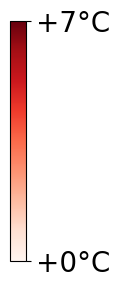

: 

In [8]:
def plot_cbar(data_species, figsize=(2, 3), cmap_='brg'):
    fig, ax = plt.subplots(figsize=figsize)
    
    cmap_species = plt.get_cmap(cmap_)
    cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    
    d = data_species.squeeze().copy()
    
    min_cbar = int(np.nanmin(d)) 
    min_cbar = 0
    max_species = int(np.nanmax(d))
    max_species = 7
    
    im = ax.imshow([[min_cbar, max_species]], cmap=cmap_species)
    im.set_visible(False)
    
    cax = fig.add_axes([0.03, 0.01, 0.08, 0.8])
    cbar = plt.colorbar(im, cax=cax)
    ax.remove()
    
    cbar.ax.set_ylim([min_cbar, max_species])
    cbar.set_ticks([int(np.ceil(min_cbar)), max_species])
    cbar.set_ticklabels(['+'+str(int(np.ceil(min_cbar))) + '°C', '+'+f"{max_species}" + '°C'],size=20)
    
plt.rcParams.update({'font.size': 20})
plot_cbar(delta_tsurf, cmap_=cmap_final)
plt.savefig(f"../figures/Figure3/cbar.png", bbox_inches='tight')